In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [15]:
model=Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3,150,150)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64)) # 64 neurons
model.add(Activation('relu'))
model.add(Dropout(0.5)) # drop 50% of neurons

# output layer: classify to 10 driver's states
model.add(Dense(6))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
train_datagen=ImageDataGenerator(rescale=1.0/255, horizontal_flip=True)

In [18]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [6]:
train_generator=train_datagen.flow_from_directory('data/train', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 11402 images belonging to 6 classes.


In [8]:
validation_generator=test_datagen.flow_from_directory('data/test', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2310 images belonging to 6 classes.


In [19]:
history = model.fit_generator(train_generator, steps_per_epoch=580, epochs=10, validation_data=validation_generator, validation_steps=180)

Epoch 1/10
580/580 [==============================] - 423s 730ms/step - loss: 0.6513 - acc: 0.7623 - val_loss: 0.0835 - val_acc: 0.9825
Epoch 2/10
580/580 [==============================] - 413s 712ms/step - loss: 0.1748 - acc: 0.9448 - val_loss: 0.0423 - val_acc: 0.9909
Epoch 3/10
580/580 [==============================] - 413s 712ms/step - loss: 0.1388 - acc: 0.9593 - val_loss: 0.0555 - val_acc: 0.9820
Epoch 4/10
580/580 [==============================] - 414s 714ms/step - loss: 0.1151 - acc: 0.9659 - val_loss: 0.0263 - val_acc: 0.9925
Epoch 5/10
580/580 [==============================] - 414s 714ms/step - loss: 0.1031 - acc: 0.9680 - val_loss: 0.0288 - val_acc: 0.9942
Epoch 6/10
580/580 [==============================] - 414s 714ms/step - loss: 0.1021 - acc: 0.9705 - val_loss: 0.0230 - val_acc: 0.9949
Epoch 7/10
580/580 [==============================] - 413s 712ms/step - loss: 0.0972 - acc: 0.9734 - val_loss: 0.0304 - val_acc: 0.9935
Epoch 8/10
580/580 [============================

In [21]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


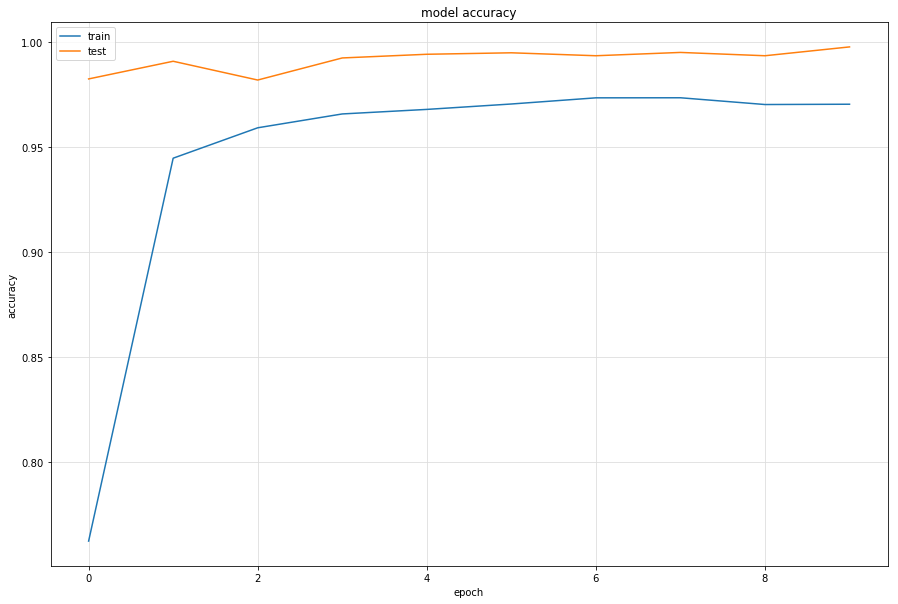

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#dddddd"


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
#plot([,,,,,,,,])
#plot([,,,,,,,,])

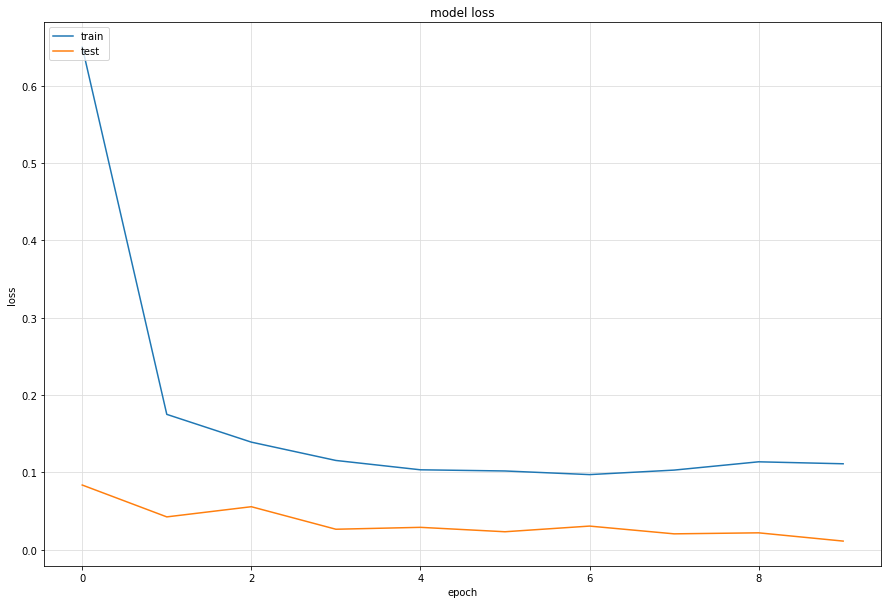

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()